## ÁLGEBRA LINEAR NUMÉRICA - Projeto 4

### ALUNOS: Alex Júnio Maia de Oliveira e João Pedro Jerônimo de Oliveira

### CURSO: Ciência de Dados e Inteligência Artificial

### ENTREGA: 21/06/2025

---

#### **Observação**: Caso não apareça o arquivo inteiro, apenas rode o Notebook novamente até aparecer o documento completo. Tal erro ocorreu com frequência no desenvolvimento do projeto.

In [3]:
# Bibliotecas usadas
import numpy as np
import random
import time
import matplotlib.pyplot as plt

---

## Questão 1. **Matrizes Gaussianas** Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A_{ij} ∼ N(0,1)$.

#### a) **Distribuição das normas** Faça um histograma da norma-2 das colunas de uma matriz gaussiana $A$, $m × n$. Use vários valores de $m$, e comente o que você observa.

**Resposta:**

In [4]:
def norm2(x):
    return np.linalg.norm(x, ord=2)

def gaussian_matrix(m:int, n:int):
    return np.random.normal(0, 1, (m,n))

def plot_dist(datas:list, legends:list, density=True, title="", bins=100):
    plt.title(title)
    n = len(datas)
    for i in range(n):
        plt.hist(datas[i], bins=bins, label=legends[i], density=density)
    plt.legend()
    plt.show()

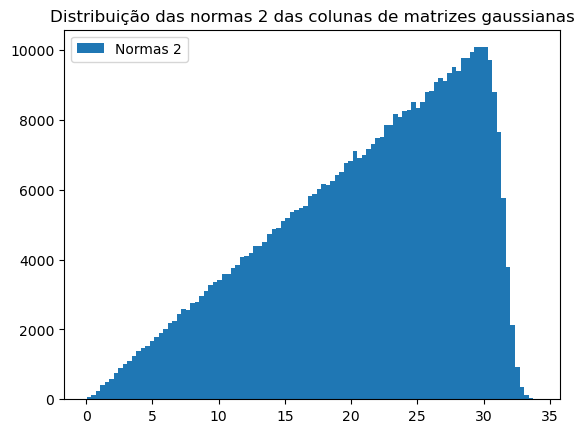

In [5]:
n = 500
norms = []
for m in range(2, 1000):
    A = gaussian_matrix(m,n)
    for j in range(n):
        norm = norm2(A[:, j])
        norms.append(norm)

plot_dist([norms], density=False, title="Distribuição das normas 2 das colunas de matrizes gaussianas", legends=["Normas 2"])

---

#### b) **Produtos internos** Agora, fixe $m = 100$ e faça o histograma do produto interno $⟨A_i, A_j⟩$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$, e use $n = 100,200, 500$ e $1000$. O que acontece? Qual parece ser a distribuição para $n → ∞$?

**Resposta:**

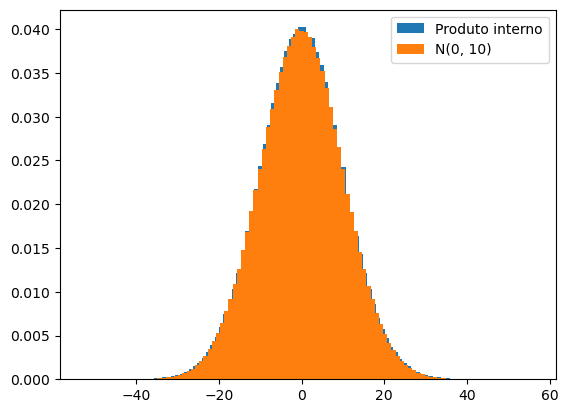

In [6]:
m = 100
ns = [100, 200, 500, 1000]
prods = []
for n in ns:
    A = gaussian_matrix(m, n)
    for i in range(n):
        for j in range(n):
            if i != j:
                prod = np.inner(A[:, i], A[:, j])
                prods.append(prod)
                
compare = []
for _ in range(1400000):
    x = np.random.normal(0, 10)
    compare.append(x)
    
plot_dist([prods, compare], ["Produto interno", "N(0, 10)"], "Distribuição do produto interno das colunas de matrizes gaussianas", bins=100)

---

#### c) **A distribuição do máximo** Queremos ver quão “não ortogonal” é a matriz $A$. Para isto, vamos estudar o máximo de $\frac{⟨A_i, A_j⟩}{||A_i||||A_j||}$ entre colunas distintas de uma matriz gaussiana $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 × 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

**Resposta:**

In [7]:
def maxes(k=1000, m=100, n=300):
    max_similarities = []
    for _ in range(k):
        A = gaussian_matrix(m, n)  # Matriz gaussiana padrão
        values = []
        norms = np.linalg.norm(A, axis=0)

        for i in range(n):
            for j in range(i + 1, n):  # Só calcula para i < j, evita repetições
                cosine_similarity = np.dot(A[:, i], A[:, j]) / (norms[i] * norms[j])
                values.append(cosine_similarity)  # abs se quiser o maior valor absoluto

        max_val = max(values)
        max_similarities.append(max_val)

    return max_similarities

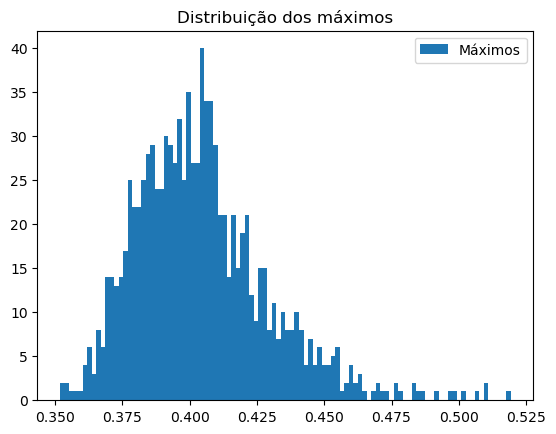

In [8]:
maxes = maxes()
plot_dist([maxes], density=False, title="Distribuição dos máximos", legends=["Máximos"])

---

#### d) **Complexidade computacional** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

**Resposta:**

---

#### e) **A distribuição do máximo, parte 2** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m, n): (100, 100), (100, 300), (200, 200), (200, 600), (500, 500), (500, 1500), (1000, 1000), (1000, 3000)$.

**Resposta:**

Fim do documento

---